# Optimization and Mixed Programming

In the previous lecture we started to discuss *optimization*, which is the process of trying to make our programs more efficient. Recall that you should not try to optimize your code as you are developing it for the first time, instead, first focus on getting a working solution, and make sure that is tidy. Put simply:
1. First make it work
2. Then make it elegant
3. Then make it fast

Also recall that when you start the process of making your code fast, it is important to *profile* your code, to identify the bottle-necks of your program, i.e., the actually slow parts. That way you can focus your valuable time on the parts of the code that actually matter, and leave the rest alone.

In this lecture we will show example of how we can actually optimize a program. As discusses, optimization isn't always with a focus on making things faster, it could for example be to reduce the memory usage of a program. In this lecture however, we focus solely on speed.

We will now go through and show examples of how different programs and algorithms can be made faster. These will only be some examples however, as optimization is a big and challenging topic. At the same time, optimization will always be problem-specific, so there is no universal general rules. The takeaway shouldn't be the specific examples we show, but more how we can think about the process of optimization as a structured approach.


## Choosing a different Algorithm

One major way to optimize a code is to choose a different way to solve the problem, i.e., a different algorithm altogether. Changing the entire algorithm can, depending on the code, be quite a drastic change and is referred to as a "high level" optimization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(12345)

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 2

### Example: Sorting

Say that we are writing data to read in data from sensors in some experimental setup and do analysis and visualization of these. After writing our code and verifying that it works, we think that it is impractically slow, and so we want to optimize it. Profiling shows that 40% of our programs time is consumed by sorting data. In our code, we have implemented this using a simple bubble sort algorithm.

In [3]:
def bubblesort(data):
    """Return copy of data sorted in increasing order."""
    sdata = data[:]
    for end in reversed(range(len(sdata))):
        for i in range(end):
            if sdata[i] > sdata[i+1]:
                sdata[i], sdata[i+1] = sdata[i+1], sdata[i]
    return sdata

Perhaps we could speed up our code by choosing a better sorting algorithm?

In IN1910, we have analyzed sorting algorithms with algorithm analysis, and showed that bubble sort was a $\mathcal{O}(n^2)$ algorithm, i.e., it scales quadratically with the length of the data to be sorted. For a code that does not do much sorting, this is probably not a major concern, for our example however, profiling shows that clearly, sorting is a big bottleneck.


To improve and optimize our code, we can therefore choose to change to a different sorting algorithm altogether. A popular choice is the aptly named "quicksort" algorithm. We can look up some [pseudocode](https://en.wikipedia.org/wiki/Quicksort#Lomuto_partition_scheme) for the algorithm on Wikipedia for example, and write it out in Python. If you are not familiar with the quicksort algorithm from before, you don't need to understand it to get the coming points. But if you *want* to understand it, you can take the time to read a bit about it, and then watch the [AlgoRythmics video on quicksort](https://www.youtube.com/watch?v=ywWBy6J5gz8).

Here is our implementation of quicksort, feel free to skip it.

In [4]:
def quicksort(data):
    """Return a copy of data sorted in increasing order."""
    sdata = data[:]
    qsort(sdata, 0, len(data))
    return sdata

def qsort(data, low, high):
    """Recursively sort data[low:high] in place."""
    if high - low < 2:
        # Single or no element, no sorting needed
        return

    pivot = partition(data, low, high)
    qsort(data, low, pivot)
    qsort(data, pivot+1, high)

def partition(data, low, high):
    """Partition data[low:high]"""
    pivot = data[high-1]
    i = low - 1
    for j in range(low, high-1):
        if data[j] < pivot:
            if i != j:
                i = i + 1
                data[i], data[j] = data[j], data[i]
    i += 1
    data[i], data[high-1] = data[high-1], data[i]
    return i

The point here is not how quicksort works or how it is implemented, the goal is simply to show how we can change and algorithm to speed up a code.

Before we move on, let us verify that both methods work. We sort some random numbers in-place, verifying that they become sorted.

In [5]:
numbers = np.random.randint(100, size=100)

s = sorted(numbers)
b = bubblesort(numbers)
q = quicksort(numbers)


assert np.all(s == b)
assert np.all(s == q)
assert np.all(b == q)

Now, we have implemented quicksort as an alternative to bubble sort, which should have an average-case of $\mathcal{O}(n\log n)$, i.e., it should scale better than bubble sort. But is it actually better? Let us check if this is the case with some timing experiments.

Let us take the time of both bubblesort and quicksort for lists of increasing size. We can do this with a for-loop, and then use `-o` to get the result of the timeit experiment as a variable. This variable will be a `TimeitResult` object, which has attributes like `best`, `average` and `worst`.

Because we will be performing a large number of experiments, we force timeit to do a 10 experiments for each time, this isn't perfect, but it's good enough for now. We do this by specifying `-r 10 -n 1` which means performing 10 runs (experiments), with 1 loop each time.

33.8 µs ± 5.9 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
14.4 µs ± 1.99 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
208 µs ± 67.1 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
90.7 µs ± 29.2 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 12.77 times longer than the fastest. This could mean that an intermediate result is being cached.
2.63 ms ± 817 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
1.35 ms ± 86.7 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 21.92 times longer than the fastest. This could mean that an intermediate result is being cached.
14.5 ms ± 4.73 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


8.48 ms ± 856 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


The slowest run took 35.14 times longer than the fastest. This could mean that an intermediate result is being cached.
53.3 ms ± 17.6 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


32.9 ms ± 2.39 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


The slowest run took 50.65 times longer than the fastest. This could mean that an intermediate result is being cached.
171 ms ± 56.3 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


134 ms ± 6.19 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)


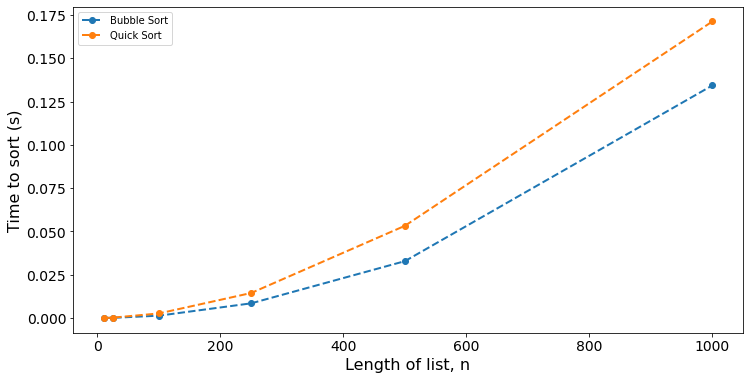

In [6]:
bs_times = []
qs_times = []

sizes = [10, 25, 100, 250, 500, 1000]

for n in sizes:
    numbers = np.random.randint(1000, size=n)
    qs = %timeit -r 10 -n 1 -o quicksort(numbers)
    qs_times.append(qs.average)

    bs = %timeit -r 10 -n 1 -o bubblesort(numbers)
    bs_times.append(bs.average)

fig, ax = plt.subplots()
ax.plot(sizes, bs_times, 'o--', label='Bubble Sort')
ax.plot(sizes, qs_times, 'o--', label='Quick Sort')
ax.set_xlabel('Length of list, n')
ax.set_ylabel('Time to sort (s)')
ax.legend()
plt.show()

So we see that for $n$ less than 1000, our bubble sort actually beats our quicksort! If our code is only sorting lists that are $\leq 1000$ elements long, then swapping bubble sort with quicksort in our code will actually make it slower! This emphasizes how important timing experiments can be sometimes.

Let us see how this changes for larger lists:

In [7]:
import sys
sys.setrecursionlimit(max(sys.getrecursionlimit(), 25000))

In [8]:
%%script echo skipping
# This code takes a long time to run
large_sizes = [1000, 2000, 5000, 10000, 25000]

for n in large_sizes:
    numbers = np.random.randint(1000, size=n)
    bs = %timeit -r 1 -n 1 -o bubblesort(numbers)
    bs_times.append(bs.average)

    qs = %timeit -r 1 -n 1 -o quicksort(numbers)
    qs_times.append(qs.average)

fig, ax = plt.subplots()
ax.plot(sizes + large_sizes, bs_times, 'o--', label='Bubble Sort')
ax.plot(sizes + large_sizes, qs_times, 'o--', label='Quick Sort')
ax.set_xlabel('Length of list, n')
ax.set_ylabel('Time to sort (s)')
ax.legend()
fig.savefig("../../figures/sorting_long.png")

skipping


```{figure} ../../figures/sorting_long.png
---
width: 600px
name: sorting_long
alt: sorting_long
---
```



So for bigger lists, the quicksort algorithm scales *much better* than bubble sort. If we are sorting lists like these in our code, then swapping bubble sort with quicksort should give a considerable speed up. This is because quicksort's $\mathcal{O}(n\log n)$ scaling is close to linear, while bubble sorts quadratic $\mathcal{O}(n^2)$ is simply unsustainable.


An alternative to implementing our own quicksort is of course simply to use the built-in `sorted`, which does what we want. Or alternatively `np.sort`. Let us perform another experiment to see which is fastest. This time we add the `-q` flag to run timeit in "quiet"-mode.

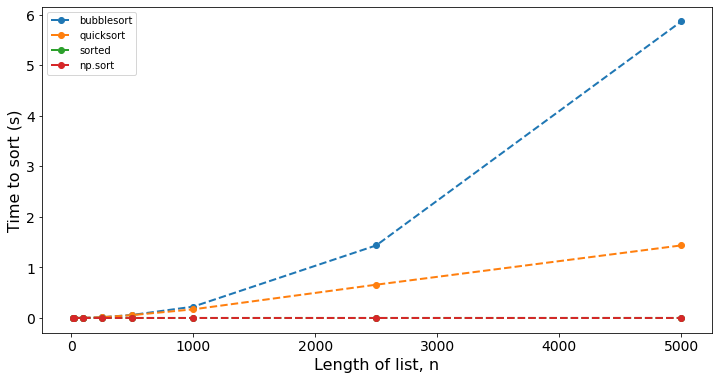

In [9]:
sorting_functions = [bubblesort, quicksort, sorted, np.sort]
times = [[], [], [], []]

sizes = [10, 25, 100, 250, 500, 1000, 2500, 5000]

for n in sizes:
    numbers = np.random.randint(1000, size=n)

    for i, sort in enumerate(sorting_functions):
        tr = %timeit -q -r 1 -n 1 -o sort(numbers);
        times[i].append(tr.average)

for t in times:
    plt.plot(sizes, t, 'o--')

plt.xlabel('Length of list, n')
plt.ylabel('Time to sort (s)')
plt.legend(['bubblesort', 'quicksort', 'sorted', 'np.sort'])
plt.show()

So we see that the built-in sorting functions outperforms ours, at least for large numbers. This is often the case, because built-ins will often be optimized by other experts, people who might be better than us. However, it is important to note that built-ins don't *always* outperform us.

We cannot see both built-ins, because they overlap. If we zoom in we can compare the two:

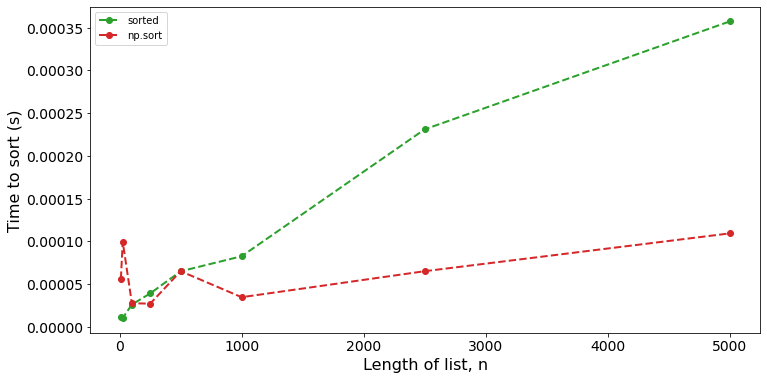

In [10]:
plt.plot(sizes, times[2], 'o--', color='C2')
plt.plot(sizes, times[3], 'o--', color='C3')
plt.legend(['sorted', 'np.sort'])
plt.xlabel('Length of list, n')
plt.ylabel('Time to sort (s)')
plt.show()

So if we are sorting large lists, then swapping our own bubblesort with `np.sort` looks like a good bet.

### Takeaways from this example:

* Choosing a different algorithm altogether can give a better scaling, and a very good run time
* Which algorithm is best depends on the problem itself. Are you sorting small or large lists?
* Using built-ins can be a better option than developing our own functions (but not always!)

### Making a choice with weighted probabilities.

As a demonstration of the last point. Let us look at something you need to do in Project 3, selecting an element from a list, but not uniformly, but with weighted probabilities.

Say we have a list of objects that is $n$ long, and a vector $\bar{p}$, where $p_i$ denotes the probability of picking element $i$ from the list. Then we know that $\sum_i p_i = 1.$.

If we want to pick an element from the list with probabilities $\bar{p}$, we can do this with `np.random.choice`:

In [11]:
elements = ['a', 'b', 'c', 'd']
p = (0.1, 0.55, 0.25, 0.1)

print(np.random.choice(elements, p=p))

b


We can also make the same choice by picking a random number in the interval $[0, 1)$, and comparing it to the cumulative probability, as described in the project description:

In [12]:
cp = np.cumsum(p)

def pick_element(elements, cp):
    r = np.random.random()
    for i, cpi in enumerate(cp):
        if r < cpi:
            return elements[i]

In [13]:
%timeit -n 1000 np.random.choice(elements)
%timeit -n 1000 pick_element(elements, cp)

20.8 µs ± 2.02 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.4 µs ± 159 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


While not a huge difference, using our own code instead of the built-in in this is more than 4 times faster. If the process of picking random elements is a major bottle-neck, this would mean replacing `np.random.choice` with our own function would reduce the total runtime by 75%.

Perhaps we could go further and somehow vectorize `np.random.choice` to be faster than our solution again? Perhaps, but this would require more work. If we were looking for a quick and easy solution, then our simple function is the way to go.

## Vectorization

For our next example, let us look at *vectorization* with NumPy. This is a large category of problems that can speed up numerical Python code significantly, especially if you are solving partial differential equations.

As an example, let us look at precisely that, a partial differential equation. As in the previous example, the problem itself is not the interesting part, and so if you don't understand the algorithm itself, that is not that important, the key point is understanding *how to make it faster*.

We choose the 1D diffusion equation, which we derived from 1D uniform random walker last week. The equation itself is

$$\frac{\partial u}{\partial t} = D \frac{\partial^2 u}{\partial x^2}.$$

Let us write a simple function that solves this PDE and then optimize it. To optimize our function, we will need to have some *benchmark* we can use to time it.

We decide on a Sawtooth function. Mathematically it can be written:
$$u(x, 0) = \frac{A}{2} - \frac{A}{\pi}\sum_{i}^\infty \frac{\sin(2\pi kft)}{k}$$

To generate it in our code however, we will use `scipy.signal.sawtooth`.

To solve our problem we will also need to set some boundary conditions. We therefore decide that we will solve the pde for the interval $x\in(0, 8\pi)$. With the boundary conditions $u(0, t) = u(0, 0)$ and $u(8\pi, t) = u(8\pi, 0)$, meaning the two endpoints won't change.

We can now plot out our initial condition in our benchmark.

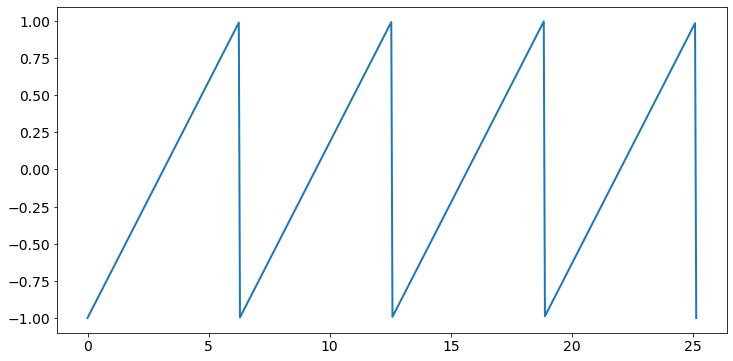

In [14]:
import scipy.signal

dt = 0.0001

x = np.linspace(0, 8*np.pi, 512)
u0 = scipy.signal.sawtooth(x)

plt.plot(x, u0)
plt.show()

Now we need to solve this equation over time. Replacing the derivatives with finite difference approximations gives:

$$\frac{u_{i, j+1} - u_{i, j}}{\Delta t} = D \frac{u_{i+1, j} - 2 u_{i, j} + u_{i-1, j}}{\Delta x^2}.$$

Which we can simplify to

$$u_{i, j+1} = u_{i, j} + D\frac{\Delta t}{\Delta x^2} \big( u_{i+1, j} - 2 u_{i, j} + u_{i-1, j} \big).$$

To simplify our benchmark, let us say we pick $D$ and $\Delta t$ so that $D \Delta t/\Delta x^2$ = 1/4. So we have

$$u_{i, j+1} = u_{i, j} + 0.25\big( u_{i+1, j} - 2 u_{i, j} + u_{i-1, j} \big),$$
and
$$u_{i, j+1} = \frac{u_{i+1, j} + 2 u_{i, j} + u_{i-1, j}}{4}.$$

We can now write our solver function:

In [15]:
def diffuse_signal(u0, steps=1024):
    """Solve the diffusion equation forward in time.

    Take a given signal in, and iterate forward in time
    using the diffusion equation. Return an array of
    the full solution.

    Parameters
    ----------
    u0 : np.ndarray
        The initial condition, u(x, 0)
    steps : int, optional
        The number of steps to take forward in time
    """
    # Create empty matrix
    N = len(u0)
    u = np.empty((steps+1, N))


    # Copy in initial condition
    u[0, :] = u0

    # Set boundaries
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    # Iterate forward in time
    for i in range(steps):
        for j in range(1, N-1):
            u[i+1, j] = (u[i, j+1] + 2*u[i, j] + u[i, j-1])/4

    return u

Let us run the function on our Sawtooth pattern. Because the result $u(x, t)$ is a two-dimensional array, plotting out the signal over time is tricky, so instead we only plot out the last signal, $u(x, T)$.

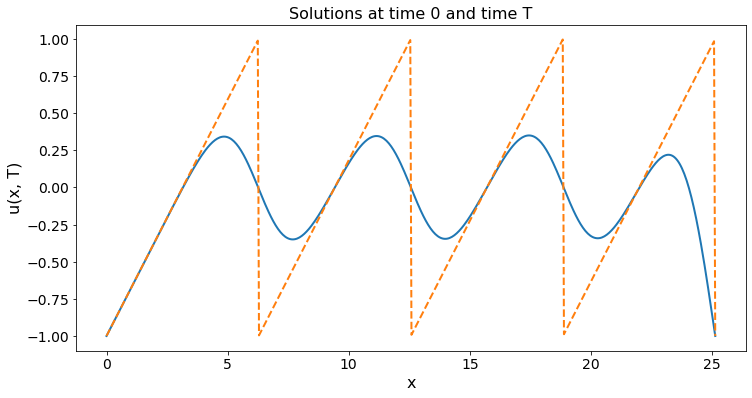

In [16]:
u = diffuse_signal(u0)

plt.plot(x, u[-1])
plt.plot(x, u0, '--')
plt.xlabel('x')
plt.ylabel('u(x, T)')
plt.title('Solutions at time 0 and time T')
plt.show()

## Optimizing our function

Now let us optimize our function. First we time our first implementation

In [17]:
ref_run = %timeit -r 1 -n 1 -o y = diffuse_signal(x, 2048)
t_ref = ref_run.best

times = [t_ref]
labels = ['python']

1.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


So it takes about one second. We have purposely made our benchmark quite simple, so that it will be faster to time it. For an actual scientific application of our function, the run time might be hours, due to using smaller time steps and grid sizes for higher precision.

If we profile our function with line profiler, we can see where we should focus our time

In [18]:
# Install line_profiler (conda install line_profiler)
%load_ext line_profiler

In [19]:
%%script echo skipping
%lprun -f diffuse_signal diffuse_signal(x, 2048)

skipping


```
Total time: 1.74107 s
File: <ipython-input-82-3a70541fd83b>
Function: diffuse_signal at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def diffuse_signal(u0, steps=1024):
     2                                               """Solve the diffusion equation forward in time.
     3
     4                                               Take a given signal in, and iterate forward in time
     5                                               using the diffusion equation. Return an array of
     6                                               the full solution.
     7
     8                                               Parameters
     9                                               ----------
    10                                               u0 : np.ndarray
    11                                                   The initial condition, u(x, 0)
    12                                               steps : int, optional
    13                                                   The number of steps to take forward in time
    14                                               """
    15                                               # Create empty matrix
    16         1         23.0     23.0      0.0      u = np.empty((steps+1, len(u0)))
    17
    18                                               # Copy in initial condition
    19         1         31.0     31.0      0.0      u[0, :] = u0
    20
    21                                               # Set boundaries
    22         1        532.0    532.0      0.0      u[:, 0] = u[0, 0]
    23         1        213.0    213.0      0.0      u[:, -1] = u[0, -1]
    24
    25                                               # Iterate forward in time
    26      2049        756.0      0.4      0.0      for i in range(steps):
    27   1046528     362883.0      0.3     20.8          for j in range(1, len(u0)-1):
    28   1044480    1376630.0      1.3     79.1              u[i+1, j] = (u[i, j+1] + 2*u[i, j] + u[i, j-1])/4
    29
    30         1          0.0      0.0      0.0      return u
```


We see that it the inner loop that spends most of the running time, with 79.1%, while the inner loop itself takes 20.8%. Combined, line 27 and 28 therefore takes a total of 99.9% of the running time! If we want to improve our function, this is definitely where we should focus on.


Vectorizing with numpy means we avoid using loops, which saves time. It will also mean the computer can do several computations at once, which is where the huge speed-up comes into play.

In this case it is quite easy to vectorize with numpy. We combine line 27 and 28 into a single line. Other than that, we change nothing. (We remove the docstring and comments for brevity)

In [20]:
def diffuse_signal_numpy(u0, steps=1024):
    """Vectorized version of diffuse_signal"""
    N = len(u0)
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    for i in range(steps):
        u[i+1, 1:-1] = (u[i, :-2] + 2*u[i, 1:-1] + u[i, 2:])/4

    return u

Let us time our vectorized function and compare it to our original one:

In [21]:
np_r = %timeit -n 10 -o diffuse_signal_numpy(x, 2048)
t_np = np_r.best

times.append(t_np)
labels.append('numpy')

18.7 ms ± 622 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


So vectorizing the inner loop brings us from roughly 1 second, to roughly 10 milliseconds, that's quite a considerable speedup! Let us print out the exact speed up

In [22]:
print("Speedup: ", t_ref/t_np)
print("Running time: {:.1%}".format(t_np/t_ref))

Speedup:  77.36424066836044
Running time: 1.3%


Meaning our vectorized code is 75 times faster! This means that the vectorized version uses 1.3% the time of the original. That is good speed up for very little investment.


To emphasize how big the speedup is, let us plot it out as a bar-plot. Note that we use logarithmic axis:

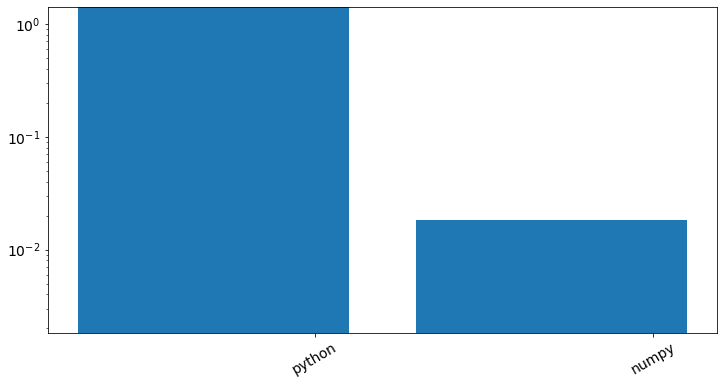

In [23]:
def plot_times():
    ind = np.arange(len(times))
    plt.bar(ind, times, log=True)
    plt.xticks(ind + 0.3, labels, rotation=30)
    plt.ylim(.1 * min(times), times[0])

plot_times()

### Why is NumPy vectorization so fast?

When we run things vectorized in numpy, the actual computations are happening in C, because NumPy is written in C to give better speed. Using NumPy properly is therefore a good example of *mixed programming*, where we combine code written in different languages. The goal of mixed programming is to be able to write most of our code in a high-level language, where things are fairly straight forward and clear. But to keep the parts of the code that require speed to be kept in a lower-level language for speed.


## Mixed Programming with Cython

If we wrote the whole function in a low-level language with C++, it would probably be a lot faster than with numpy vectorization. But as you have experienced, working in a low-level language is slightly tricky. While you might be able to write the solver function itself, the rest of the code would be tricky. Say for instance you want to plot your function out, then you would need to write your results to a file, then load that file into Python, and then plot it.

With mixed programming, the goal is to write only the parts that need to be fast in low-level code, and then *use* it from your high level code. With Python and C/C++, there are many tools developed to make this process easier. With some of these, you write actual C/C++ code first, and then you *wrap it* in Python. Meaning you find ways to call the C/C++ functions from Python. Tools that do this are for example *swig* and *PyBind*.

Another option is to write C-code into your Python script, and this is what we will focus on now. One tool to do this is [Cython](http://cython.org/). You can think of Cython like a C-compiler that also knows Python. After writing your Python script, you can compile it, which converts everything into C code that you can run from the rest of your Python code.

To use Cython, you need to install it. You can do so through pip:
* `pip3 install cython`
or if you are using Anaconda:
* `conda install cython`

Note that the UiO Jupyterhub has Cython installed. So you can use it there if you are having trouble installing it locally.


### Compiling Cython and Jupyter

When writing Cython code, you will need to compile it before it can be run. You can read more about that in [this guide](https://cython.readthedocs.io/en/latest/src/quickstart/build.html). However, there is also an IPython extension which makes the whole process a lot easier, and we can use this extension inside Jupyter.

To import the extension, you simply write:

In [24]:
%load_ext Cython

Now, if you write `%%cython` at the top of a cell where you define a function, that cell is automatically compiled to C code for us. Let us look at an example, a function to compute a triangle number, i.e., the sum
$$T_n = \sum_{i=1}^n i.$$
First we make a normal python function that does this:

In [25]:
def triangle(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

Next we use Cython to compile the same function for us:

In [26]:
%%cython

def ctriangle(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total

Let us compare them based on speed:

In [27]:
%timeit -n 1000 triangle(1000)

51.1 µs ± 1.48 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [28]:
%timeit -n 1000 ctriangle(1000)

35.2 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So we see that simply writing `%%cython` lets us compile our Python code, making it about twice as fast.

However, the main goal of Cython isn't to simply compile Python code, but to write C-like code inside Python. This allows the Cython compiler to optimize things for us. The main thing we need to do to optimize Cython code is to inform it about the types of our variables. We therefore go from the dynamic typing of Python, to a more C++-like typing:

In [29]:
%%cython

def ctriangle_v2(int n):
    cdef int i
    cdef int total = 0
    for i in range(1, n+1):
        total += i
    return total

Here we have changed our original function to specify that `n`, `i` and `total` are integer variables. We have done this with the keyword `cdef` to define C variables. The most important part here is that we have defined the loop variable `i` to be an integer, this lets Cython optimize the loop to be a much more efficient C-loop.

In [30]:
%timeit -n 1000 ctriangle_v2(1000)

492 ns ± 43.9 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


So simply compiling our pure python code with Cython gave us a speedup of around 2 (twice as fast), but when declaring the variable types in addition, we get an additional factor of 60! This means our function is a total of 120 times faster, more than two order of magnitude.


When compiling with Cython, the goal is to get the compiler to make efficient C code, which it needs some help to do. Luckily, the compiler can actually tell us where it needs help. If you run Cython with `%%cython -a`, it *annotates* your code. You can a write out where lines that it found hard to optimize har highlighted in yellow:

In [31]:
%%cython -a

def ctriangle_v2(int n):
    cdef int i
    cdef int total = 0
    for i in range(1, n+1):
        total += i
    return total

Put simply, yellow highlighting hints at Python interaction, and will slow down our code. We are nearly perfect now, because nothing in our function is yellow, except for the return. We can fix the return by defining the return type in our function declaration:

In [32]:
%%cython -a

cpdef int ctriangle_v3(int n):
    cdef int i
    cdef int total = 0
    for i in range(1, n+1):
        total += i
    return total

Now we only have the function declaration itself which is Python interaction, and we cannot really fix that, because we will always need to use some Python when entering the function.

In [33]:
%timeit -n 1000 ctriangle_v3(1000)

564 ns ± 142 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Much better!
Now there's only Python when entering the function,
which is about as good as we can do.


### Diffusion Equation with Cython

Now that we have learned about Cython, let us return to the diffusion equation, and see if we can optimize it even further with Cython. Let us first try with no hints, and no vectorization. Note that we can use numpy inside Cython, but we will need to import it inside the cell we compile our Cython code in.

In [34]:
%%cython

import numpy as np

def diffuse_signal_cython(u0, steps=1024):
    N = len(u0)
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    for i in range(steps):
        for j in range(1, N-1):
            u[i+1, j] = (u[i, j+1] + 2*u[i, j] + u[i, j-1])/4

    return u

In [35]:
c1 = %timeit -r 1 -n 1 -o y = diffuse_signal_cython(x, 2048)
t_c1 = c1.best
times.append(t_c1)
labels.append("cython (no hints)")

1.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


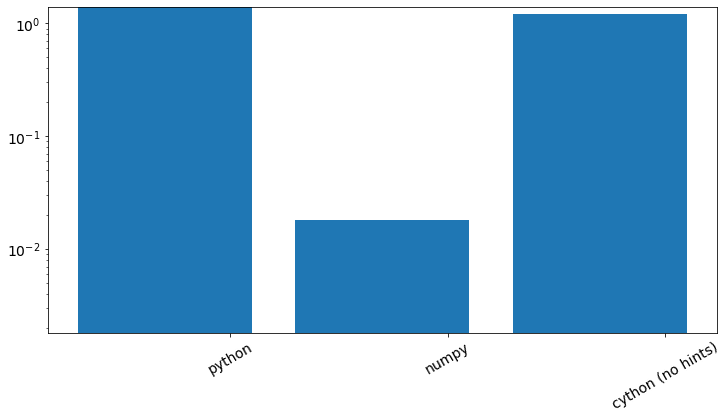

In [36]:
plot_times()

Without any annotations to Cython, we barely get a speed up of the Pure Python version. Let us start giving Cython some more information to work with. We can also do a `cimport` of numpy. This allows Cython to call directly on Numpy's C code, instead of doing this *through Python*, which would slow things down.


Without annotations, we don't get much improvement over the pure Python version.
We can note the types of the input arguments, to get some improvements. The argument `steps` is an int, so are the variables `N`, `i`, and `j`. So far so good. But what about `u0` and `u`? Well, these are numpy arrays, which have the datatype `np.ndarray`, but we also need to explain that they contain doubles, and that `u0` is 1D, while `u` is 2D. We can do this with
* `np.ndarray[double, ndim=1]`
* `np.ndarray[double, ndim=2]`

In [37]:
%%cython

import numpy as np
cimport numpy as np

def diffuse_signal_cython_v2(np.ndarray[double, ndim=1] u0, int steps=1024):
    cdef size_t N = len(u0)

    cdef np.ndarray[double, ndim=2] u
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    cdef int i, j
    for i in range(steps):
        for j in range(1, N-1):
            u[i+1, j] = (u[i, j+1] + 2*u[i, j] + u[i, j-1])/4

    return u

In file included from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /github/home/.cache/ipython/cython/_cython_magic_1b21d954ddceb3e0a8550f870c44670f.c:722:
/venv/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/github/home/.cache/ipython/cython/_cython_magic_1b21d954ddceb3e0a8550f870c44670f.c: In function ‘__pyx_pf_46_cython_magic_1b21d954ddceb3e0a8550f870c44670f_diffuse_signal_cython_v2’:
/github/home/.cache/ipython/cython/_cython_magic_1b21d954ddceb3e0a8550f870c44670f.c:2146:37: warning: c

4.68 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


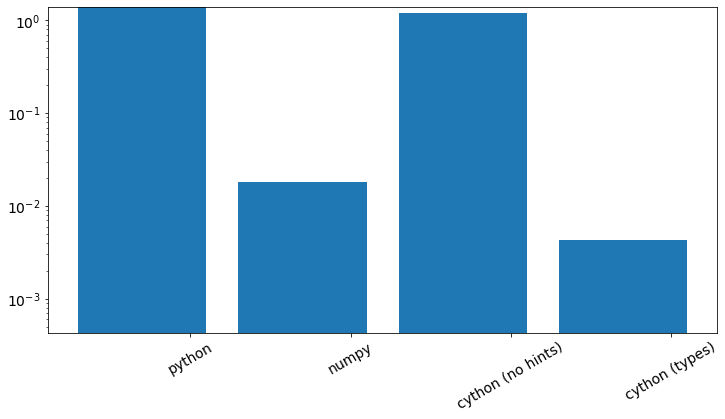

In [38]:
ct = %timeit -n 10 -o y = diffuse_signal_cython_v2(x, 2048)
t_ct = ct.best

times.append(t_ct)
labels.append("cython (types)")
plot_times()

By compiling with Cython and declaring types, we have gotten a non-vectorized version down to ~3 ms, which is 3-4 times faster than our version vectorized with Numpy.


Can we use Cython on our vectorized code?

In [39]:
%%cython

import numpy as np
cimport numpy as np

def diffuse_signal_cython_v3(np.ndarray[double, ndim=1] u0, int steps=1024):
    cdef size_t N = len(u0)

    cdef np.ndarray[double, ndim=2] u
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    cdef int i, j
    for i in range(steps):
        u[i+1, 1:-1] = (u[i, :-2] + 2*u[i, 1:-1] + u[i, 2:])/4

    return u

In file included from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /github/home/.cache/ipython/cython/_cython_magic_7f6c9056a412bd30c46e3301bd446c5f.c:723:
/venv/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~


5 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


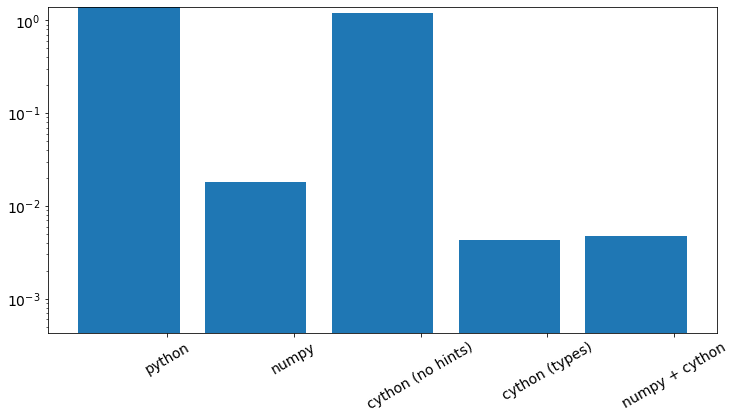

In [40]:
ct = %timeit -n 10 -o y = diffuse_signal_cython_v2(x, 2048)
t_ct = ct.best

times.append(t_ct)
labels.append("numpy + cython")
plot_times()

Surprisingly, no! In this case, doing the vectorized computation with the numpy arrays doesn't improve things much. This is because Cython with types have already converted things to C loops, and so the Numpy vectorization is more or less the same thing.


However, we can optimize even further with Cython by also using *macros*. Normal computations with Numpy arrays have two nice features that we don't actually need. The first is bounds checking, which is what throws an error if we go out of bounds. And the second is negative indexing. Recall that both of these features are not in C/C++ arrays.

While these features are nice, they also take some time from our super optimized solver. So we can *turn them of*. Cython can do this for us:

In [41]:
%%cython
#cython: boundscheck=False
#cython: wraparound=False

import numpy as np
cimport numpy as np

def diffuse_signal_cython_v4(np.ndarray[double, ndim=1] u0, int steps=1024):
    cdef size_t N = len(u0)

    cdef np.ndarray[double, ndim=2] u
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    cdef int i, j
    for i in range(steps):
        for j in range(1, N-1):
            u[i+1, j] = (u[i, j+1] + 2*u[i, j] + u[i, j-1])/4

    return u

In file included from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarraytypes.h:1969,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /venv/lib/python3.10/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /github/home/.cache/ipython/cython/_cython_magic_29e9d4d3dc128c484177bbbe8efd5384.c:724:
/venv/lib/python3.10/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~
/github/home/.cache/ipython/cython/_cython_magic_29e9d4d3dc128c484177bbbe8efd5384.c: In function ‘__pyx_pf_46_cython_magic_29e9d4d3dc128c484177bbbe8efd5384_diffuse_signal_cython_v4’:
/github/home/.cache/ipython/cython/_cython_magic_29e9d4d3dc128c484177bbbe8efd5384.c:2118:37: warning: c

2.73 ms ± 98.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


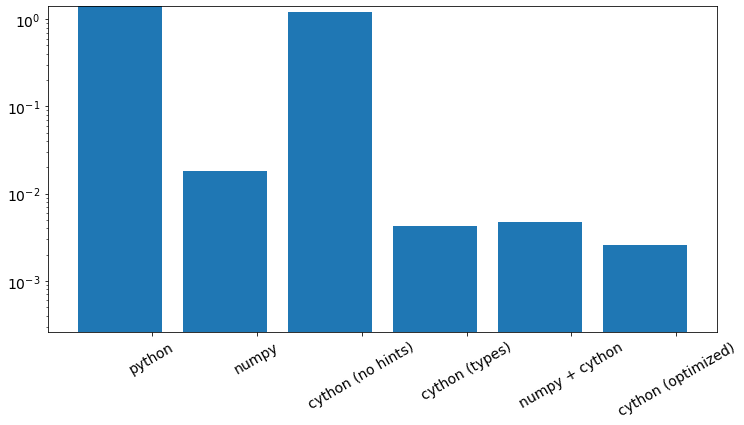

In [42]:
copt = %timeit -n 100 -o y = diffuse_signal_cython_v4(x, 2048)
t_copt = copt.best
times.append(t_copt)
labels.append("cython (optimized)")
plot_times()

Note that while the difference between the two last bars seems very small, the axis is logarithmic, and so there is about a factor 2 difference.


## JIT Compiling with numba

When compiling Python code with Cython, we are performing a step usually referred to as JIT compiling, which stands for "just-in-time" compiling. Other JIT compiling tools exists for Python, a popular example is [numba](http://numba.pydata.org/). Numba is a library that attempts to automatically do type-based optimizations like we did with Cython. The nice thing is that numba does this automatically.

To use numba, you decorate functions with `@jit`. Let us try it on our vectorized function. We only add the decorator, no other code is changed:

In [43]:
import numba

@numba.jit
def diffuse_signal_numba(u0, steps=1024):
    """Vectorized version of diffuse_signal"""
    N = len(u0)
    u = np.empty((steps+1, N))
    u[0, :] = u0
    u[:, 0] = u[0, 0]
    u[:, -1] = u[0, -1]

    for i in range(steps):
        u[i+1, 1:-1] = (u[i, :-2] + 2*u[i, 1:-1] + u[i, 2:])/4

    return u

The slowest run took 138.62 times longer than the fastest. This could mean that an intermediate result is being cached.
50.2 ms ± 116 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


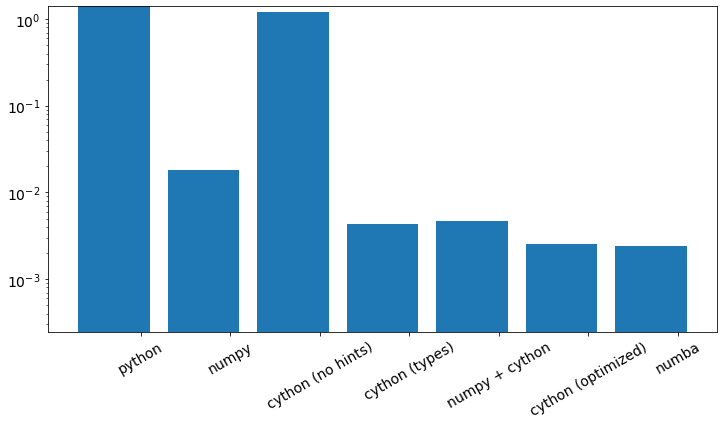

In [44]:
nb = %timeit -n 3 -o diffuse_signal_numba(x, 2048)
t_nb = nb.best
times.append(t_nb)
labels.append("numba")
plot_times()

Looking at these results, numba is quite impressive. It has managed to beat all but the most optimized of our implementations, and it did so with zero help or hints from us. Like Cython, numba can do an even better job if you provide it with more information.

## Combining C++ with python

Throughout this course we have learned about python and C++, and you might wonder if it is possible to combine the speed C++ with the user friendliness of python. Say that you have written some highly optimized code in C++ and you want to call this code from your python project. Is this possible?

The answer to this questions is YES!. In fact, this way of creating user friendly code in python, and carry out the heavy lifting in some other programming language such as C, Fortran or C++ is a paradigm that is heavily used in scientific computing. For example a lot of the performant code in scipy is written in Fortran and, as you probably know already, numpy relies heavily on C – extensions.

Writing C-extensions has been the traditional way of writing performant code. Since python itself is written in C, we have had C-extension around for quite some time already.
However, more recently there has been ongoing work in order to be able to bring in also call C++ code from python, and we will now go through a simple example on how this can be achieved.

If you want to learn more about how you can create C-extensions and make calls to C code from python you can check out [this article](https://docs.python-guide.org/scenarios/clibs/) which talks about ctypes and swig.

### Creating python binding to C++ using pybind11

[pybind11](https://pybind11.readthedocs.io/en/stable/intro.html) is a library that creates a bridge between python and C++. Many larger projects that rely on calling out to C++ code from python has now moved to using pybind11, for example [FEniCs](https://fenicsproject.org).

The first thing you need to do is to install pybind11. If you are using anaconda, you can simply to `conda install -c conda-forge pybind11
 `. If you are not using anaconda, please consult the pybind11 documentation page.

The following example is taken from the [pybind11 documentation page]( https://pybind11.readthedocs.io/en/stable/basics.html#creating-bindings-for-a-simple-function)
Say that we have a simple add function written in C++ that we want to call from python
```C++
int add(int i, int j) {
    return i + j;
}

```
Now we want to create a binding to python. In the following code we have included pybind11 headers and written a simple binding

```C++
#include <pybind11/pybind11.h>

int add(int i, int j) {
    return i + j;
}

PYBIND11_MODULE(example, m) {
    m.doc() = "pybind11 example plugin"; // optional module docstring

    m.def("add", &add, "A function which adds two numbers");
}
```
First argument to `PYBIND11_MODULE`  is the name of the module which we here set to example. The second argument is a variable which we use to create the bindings.
`m.doc()` can be used to create a docstring for the module.
`m.def()` is used generated the binding code for a function. The first argument is the name of the function as it will appear in the python module. The second argument is a reference to the function, and the third argument is the docstring for the function. Remaining arguments can be used to define names of the argument,
so that we can use keyword arguments in python. See example on the pybind11 documentation page for more info.

Now we can compile with the following command on linux (or WSL on Windows)
```
c++ -O3 -Wall -shared -std=c++11 -fPIC `python3 -m pybind11 --includes` example.cpp -o example`python3-config --extension-suffix`
```
or the following command on Mac OSX
```
c++ -O3 -Wall -shared -std=c++11 -undefined dynamic_lookup `python3 -m pybind11 --includes` example.cpp -o example`python3-config --extension-suffix`
```

If you want to compile this on Windows, you need to use [CMake](https://pybind11.readthedocs.io/en/stable/compiling.html#cmake).

In [45]:
# Here we just call out to
!make -C pybind11/add_function

make[1]: *** pybind11/add_function: No such file or directory.  Stop.


You can now import the module after first adding the compiled shared library file to your python path (if you are running from the same directory as the compiled file you do not need to add it to the path)

In [46]:
# Add the folder where the compiled code is located
import sys
sys.path.insert(0, "pybind11/add_function")
import example
i = 2
j = 4
result = example.add(i, j)
print(f"{i} + {j} = {result}")

ModuleNotFoundError: No module named 'example'

### Performance gain from pybind11

You might ask if it worth going through all the work of writing these binding and perform the compilation. Usually you will find a function in `numpy` which implements what you want to do. We can investigate the performance by looking at a very simple benchmark problem, i.e summing all the numbers from 1 to $N$. In python you could to something like this

In [47]:
# Let us set N to a big number
N = 100_000_000

In [48]:
import time
t0 = time.perf_counter()
s = 0
for i in range(N):
    s += i
t1 = time.perf_counter()
print(f"Elapsed time: {t1-t0:.2e} seconds")

Elapsed time: 1.11e+01 seconds


We can probably improve this by avoiding the `for` loop and using the built-in `sum` function

In [49]:
t0 = time.perf_counter()
s = sum(range(N))
t1 = time.perf_counter()
print(f"Elapsed time: {t1-t0:.2e} seconds")

Elapsed time: 1.94e+00 seconds


And we should expect to get an even better speedup by moving to `numpy`

In [50]:
t0 = time.perf_counter()
s = np.sum(np.arange(N))
t1 = time.perf_counter()
print(f"Elapsed time: {t1-t0:.2e} seconds")

Elapsed time: 4.19e-01 seconds


How can we do this in pybind11? Here is one example (note that we use `unsigned long int` instead of `int` to handle very large numbers)

```C++
#include <pybind11/pybind11.h>

namespace py = pybind11;

unsigned long int sum(unsigned long int n) {
    unsigned long int s = 0;
    for (unsigned long int i = 0; i < n; i++) {
        s += i;
    }
    return s;
}

PYBIND11_MODULE(bigsum, m) {
    m.doc() = "pybind11 bigsum example";  // optional module docstring

    m.def("sum", &sum, "Sum all elements from 0 to n", py::arg("n"));
}
```

In [51]:
!make -C pybind11/bigsum

make[1]: *** pybind11/bigsum: No such file or directory.  Stop.


In [52]:
import sys
sys.path.insert(0, "pybind11/bigsum")
import bigsum
t0 = time.perf_counter()
s = bigsum.sum(N)
t1 = time.perf_counter()
print(f"Elapsed time: {t1-t0:.2e} seconds")

ModuleNotFoundError: No module named 'bigsum'

That is a massive speedup! We can repeat the experiment with different `N` and plot the results

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
import bigsum


labels = ["pybind11", "pure python", "python sum", "numpy"]


def run(N):
    t0 = time.perf_counter()
    # Pybind11
    s1 = bigsum.sum(N)
    t1 = time.perf_counter()
    # Pure python
    s2 = 0
    for i in range(N):
        s2 += i
    t2 = time.perf_counter()
    # python sum
    s3 = sum(range(N))
    t3 = time.perf_counter()
    # numpy sum
    s4 = np.sum(np.arange(N))
    t4 = time.perf_counter()

    # Check that all results are the same
    assert s1 == s2 == s3 == s4

    return dict(zip(labels, [t1 - t0, t2 - t1, t3 - t2, t4 - t3]))


if __name__ == "__main__":

    Ns = [1_000_000, 5_000_000, 10_000_000, 50_000_000, 100_000_000]
    timings = {"pybind11": [], "pure python": [], "python sum": [], "numpy": []}

    for N in Ns:
        res = run(N)
        for label, timing in res.items():
            timings[label].append(timing)

    x = np.arange(len(Ns))
    width = 0.15
    fig, ax = plt.subplots(figsize=(12, 6))

    for i, (label, timing) in enumerate(timings.items(), start=-2):
        ax.bar(x + i * width, timing, width, label=label)

    ax.set_yscale("log")
    ax.legend()
    ax.set_xticks(x)
    ax.set_xticklabels([f"{N:.1e}" for N in Ns])
    ax.set_ylabel("Time (seconds)")
    ax.set_xlabel("N")
    plt.show()

ModuleNotFoundError: No module named 'bigsum'

## Closing Remarks

In this lecture we have look at how we can make our code faster. The main goal of the process is to identify bottle-necks in our code, and then replace the slow parts, with faster alternatives.

First we looked at how we can change to completely different approaches to the problem. If this is possible, it is often a good idea. Such high level optimizations can change our code to an algorithm better suited for our needs, which can give a considerable speed up and much better scaling. The best case scenario here would be to replace a computational algorithm with an analytic solution, then we could bypass the whole computations. The `triangle` function we covered earlier is a good example of this. For this problem, we know the analytic solution

$$T_n = \frac{n(n+1)}{2}.$$
So while messing around in Cython gave us a speed of 120 times. Simply changing our whole approach to the analytic solution would have been even better, as it will be faster, and $\mathcal{O}(1)$.

Lastly we looked at tools for mixed programming with C/C++ and Python: Cython and numba. The nice thing with these tools is that you choose how far you want to go. If you need faster code, you could simply sit down and write the whole thing in C++, but it would take a lot of time before you even had running code, much less working and well tested code.

With Cython or numba (or similar tools) you can simply write a functional Python code, and then step by step improve it by JIT compiling and giving more and more hints. This is a much faster and incremental way of doing mixed programming, and works well for smaller projects/solo-work. For large scale projects, such as the development of NumPy, or FEniCS, code is usually developed in C++, and then wrapped for use in Python with tools like PyBind or swig.